## PetFinder.my Adoption Prediction

### Must predict the speed of adoption which is a number from 0 to 4.

### Training Data

In [94]:
import pandas as pd

In [95]:
data = pd.read_csv('data/train.csv')

In [96]:
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [98]:
data.shape

(14993, 24)

In [99]:
data.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [100]:
data.isna().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

## Spliting Data

In [101]:
cols_train = ['Age', 'Type', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'AdoptionSpeed']
train_data = data[cols_train]
X = train_data.drop('AdoptionSpeed', axis=1)
y = train_data['AdoptionSpeed'] 

In [102]:
X.head()

,Age,Type,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health
0,3,2,1,1,1,2,2,2,1
1,1,2,1,2,2,3,3,3,1
2,1,1,1,2,2,1,1,2,1
3,4,1,2,2,1,1,1,2,1
4,1,1,1,2,1,2,2,2,1


In [103]:
y.head()

0    2
1    0
2    3
3    2
4    2
Name: AdoptionSpeed, dtype: int64

## Modify Data

Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)

Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)

Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

1 = YES

0 = NO and NOT SURE

In [104]:
X['Vaccinated'] = X.Vaccinated.map(lambda x : 0 if x >= 2 else 1)
X['Dewormed'] = X.Dewormed.map(lambda x : 0 if x >= 2 else 1)
X['Sterilized'] = X.Sterilized.map(lambda x : 0 if x >= 2 else 1)

In [105]:
X.nunique()

Age             106
Type              2
Gender            3
MaturitySize      4
FurLength         3
Vaccinated        2
Dewormed          2
Sterilized        2
Health            3
dtype: int64

In [106]:
yy = pd.get_dummies(y)

## Split into train and validation

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_valid, y_train, y_valid = train_test_split(X, yy, test_size=0.2, random_state=49)

In [110]:
scale = StandardScaler()

In [111]:
X_train_s = scale.fit_transform(X_train)
X_valid_s = scale.transform(X_valid)

## Models

In [112]:
from tensorflow import keras
from tensorflow.keras import layers

In [113]:
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=[len(cols_train)-1]),
    layers.Dense(10, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='relu'),
    layers.Dense(5, activation='softmax') # 0, 1, 2, 3 ou 4
])

In [114]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [115]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

Epoch 1/200
24/24 [==============================] - 3s 16ms/step - loss: 2.2692 - accuracy: 0.3167 - val_loss: 1.7403 - val_accuracy: 0.3478
Epoch 2/200
24/24 [==============================] - 0s 4ms/step - loss: 1.8561 - accuracy: 0.2999 - val_loss: 1.6216 - val_accuracy: 0.3221
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 1.6921 - accuracy: 0.2851 - val_loss: 1.5516 - val_accuracy: 0.3324
Epoch 4/200
24/24 [==============================] - 0s 4ms/step - loss: 1.5865 - accuracy: 0.2991 - val_loss: 1.4969 - val_accuracy: 0.3471
Epoch 5/200
24/24 [==============================] - 0s 4ms/step - loss: 1.5311 - accuracy: 0.3027 - val_loss: 1.4686 - val_accuracy: 0.3518
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 1.5003 - accuracy: 0.3052 - val_loss: 1.4554 - val_accuracy: 0.3531
Epoch 7/200
24/24 [==============================] - 0s 4ms/step - loss: 1.4838 - accuracy: 0.3011 - val_loss: 1.4488 - val_accuracy: 0.3575
Epoch 8/200


<AxesSubplot:title={'center':'Accuracy'}>

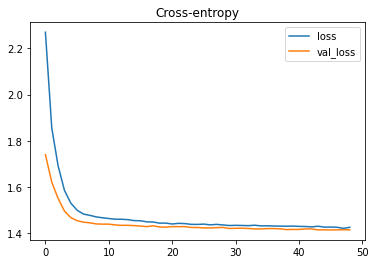

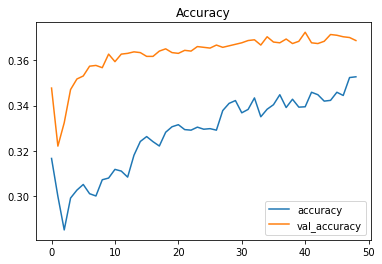

In [116]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
    verbose=1
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [124]:
print ("Running final scoring on test data")
score = model.evaluate(X_valid, y_valid, verbose=1)
print ("The accuracy for this model is ", format(score[1], ",.2f"))

Running final scoring on test data
94/94 [==============================] - 0s 1ms/step - loss: 1.4153 - accuracy: 0.3685
The accuracy for this model is  0.37


## Test Data

In [126]:
import numpy as np

In [127]:
test = pd.read_csv('data/test.csv')

In [128]:
test_data = test[cols_train[0:len(cols_train)-1]] # not getting AdoptionSpeed

In [129]:
test_data = scale.fit_transform(test_data)

In [130]:
score = model.predict(test_data, verbose=1)
# returns indices of the max element of the array in a particular axis.
predictions = np.argmax(score,axis=1)
predictions

125/125 [==============================] - 0s 1ms/step


array([4, 1, 1, ..., 2, 2, 2], dtype=int64)

In [131]:
submission = pd.DataFrame({'PetID' : test.PetID})
submission['AdoptionSpeed'] = predictions

In [133]:
submission.to_csv("submission.csv", index=False, header=True)

submission.head(10)

,PetID,AdoptionSpeed
0,e2dfc2935,4
1,f153b465f,1
2,3c90f3f54,1
3,e02abc8a3,2
4,09f0df7d1,1
5,0487529d4,1
6,bae7c4b1c,1
7,548bcf206,1
8,0f82cea1e,1
9,a3787f15e,4
